# PyTorch tutorial
#### https://pytorch.org/tutorials/beginner/nn_tutorial.html
# WHAT IS TORCH.NN REALLY?
by Jeremy Howard, fast.ai. Thanks to Rachel Thomas and Francisco Ingham.

We recommend running this tutorial as a notebook, not a script. To download the notebook (.ipynb) file, click the link at the top of the page.

PyTorch provides the elegantly designed modules and classes torch.nn , torch.optim , Dataset , and DataLoader to help you create and train neural networks. In order to fully utilize their power and customize them for your problem, you need to really understand exactly what they’re doing. To develop this understanding, we will first train basic neural net on the MNIST data set without using any features from these models; we will initially only use the most basic PyTorch tensor functionality. Then, we will incrementally add one feature from torch.nn, torch.optim, Dataset, or DataLoader at a time, showing exactly what each piece does, and how it works to make the code either more concise, or more flexible.

**This tutorial assumes you already have PyTorch installed, and are familiar with the basics of tensor operations.** (If you’re familiar with Numpy array operations, you’ll find the PyTorch tensor operations used here nearly identical).

MNIST data setup
We will use the classic MNIST dataset, which consists of black-and-white images of hand-drawn digits (between 0 and 9).

We will use pathlib for dealing with paths (part of the Python 3 standard library), and will download the dataset using requests. We will only import modules when we use them, so you can see exactly what’s being used at each point.

# MNIST data setup

We will use the classic MNIST dataset, which consists of black-and-white images of hand-drawn digits (between 0 and 9).

We will use pathlib for dealing with paths (part of the Python 3 standard library), and will download the dataset using requests. We will only import modules when we use them, so you can see exactly what’s being used at each point.

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"

FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

This dataset is in numpy array format, and has been stored using pickle, a python-specific format for serializing data.

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

Each image is 28 x 28, and is being stored as a flattened row of length 784 (=28x28). Let’s take a look at one; we need to reshape it to 2d first.

torch.Size([50000, 784])


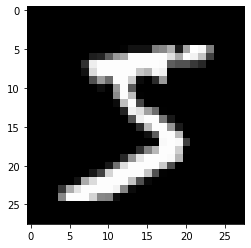

In [12]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

PyTorch uses torch.tensor, rather than numpy arrays, so we need to convert our data.

### Take a Moment! : Python map() function

```map()``` function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

**Syntax** :

> ```map(fun, iter)```

**Parameters** :

> fun : It is a function to which map passes each element of given iterable.

> iter : It is a iterable which is to be mapped.

**NOTE** : You can pass one or more iterable to the map() function.

**Returns** :

> Returns a list of the results after applying the given function  
to each item of a given iterable (list, tuple etc.) 
 
**NOTE** : The returned value from map() (map object) then can be passed to functions like list() (to create a list), set() (to create a set) .
 

### Take a Moment! ```torch.tensor()``` function

> ```torch.tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False)``` → Tensor

Constructs a tensor with data.

**Parameters**
> **data (```array_like```)** – Initial data for the tensor. Can be a list, tuple, NumPy ndarray, scalar, and other types.

**Keyword Arguments**
- **dtype (```torch.dtype```, optional)** – the desired data type of returned tensor. Default: ***if None, infers data type from data.***

- **device** (```torch.device```, optional) – the desired device of returned tensor. Default: if None, uses the current device for the default tensor type (see torch.set_default_tensor_type()). device will be the CPU for CPU tensor types and the current CUDA device for CUDA tensor types.

- **requires_grad** (bool, optional) – If autograd should record operations on the returned tensor. Default: False.

- **pin_memory** (bool, optional) – If set, returned tensor would be allocated in the pinned memory. Works only for CPU tensors. Default: False.

<->

A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

In [10]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(x_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0.) tensor(9)


In [17]:
a = torch.tensor(np.array([0.,2, 3]))
b = torch.tensor(np.array([1, 2, 3]))

print(a, b)
print(a.dtype, b.dtype)

tensor([0., 2., 3.], dtype=torch.float64) tensor([1, 2, 3], dtype=torch.int32)
torch.float64 torch.int32
